#Ubah memakai 
#1. Buat Transfer learning dengan RESNET50, untuk klasifikasi image : 
#becak,dokar, pedati. (di download mengunakan image downloader (bingimagedownloader)
#)
#pedati, docar, dan ll. harus ditraining ulang. 
#restnet50 yang sudah ditraining, pretraining dengan images
imgnp = np.array(img)
imgnp.shape
#dibuatkan layer layer baru di bagian belakang, kemudian di training=>

# TUGAS: Buat transfer learning dengan RESNET50 (pretrained dengan imagenet), untuk klasifikasi image: becak, dokar, pedati

Download memakai imagedownloader (misal bingimagedownloader)

In [78]:
from bing_image_downloader import downloader
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Daftar kata kunci yang ingin diunduh
keywords = ["becak", "dokar", "pedati"]
# Jumlah gambar yang ingin diunduh per kata kunci
limit_per_keyword = 50 
# Download untuk setiap kata kunci
for keyword in keywords:
    print(f"Mengunduh gambar untuk: {keyword}")
    downloader.download(
        keyword,
        limit=limit_per_keyword,
        output_dir='dataset_images',  # folder utama hasil download
        adult_filter_off=True,
        force_replace=False,
        timeout=60
    )
print("Semua gambar berhasil diunduh!")

Mengunduh gambar untuk: becak
[%] Downloading Images to d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\codinganPakSurya\dataset_images\becak


[!!]Indexing page: 1

[%] Indexed 42 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/b/b7/Becak_Bogor.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://pre00.deviantart.net/aee7/th/pre/i/2008/093/f/a/becak_indonesian_pedicab_by_mikezzzz.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wikitravel.org/upload/shared/thumb/2/2b/Indonesia_bike46.jpg/480px-Indonesia_bike46.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://4.bp.blogspot.com/-g2icyMUXXZU/VI3NnUT2PFI/AAAAAAAAN2c/7GOUsiCNdl4/s1600/Yogyakarta%2B(2).JPG
[%] File Downloaded !

[%] Downloading Image #5 from https://photos1.blogger.com/blogger/2884/681/640/semarang agustus 2006 108.jpg
[!] Issue getting: https://photos1.blogger.com/blogger/2884/681/640/semarang

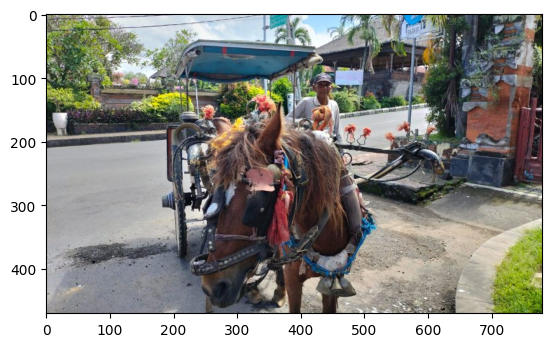

In [6]:
# baca image pakai Pillow dan plt.imshow(img)
fileimg ="D:/KULIAH/S2/Semester 2/Proposal Thesis/TugasIbuHanna Mengarah ke Tugas Akhir/Codingan/codinganPakSurya/dataset_images/dokar/Image_50.jpg"
img = Image.open(fileimg)
plt.imshow(img)

In [7]:
imgnp = np.array(img)
imgnp.shape

(470, 780, 3)

In [79]:
train_dir = "D:/KULIAH/S2/Semester 2/Proposal Thesis/TugasIbuHanna Mengarah ke Tugas Akhir/Codingan/codinganPakSurya/dataset_images"
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2 
)
# Data generator
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training'
)
val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 120 images belonging to 3 classes.
Found 29 images belonging to 3 classes.


In [80]:
# ============================================
#  LOAD MODEL RESNET50 (PRETRAINED IMAGENET)
# ============================================
base_model = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)
# Freeze seluruh layer ResNet50
for layer in base_model.layers:
    layer.trainable = False
# ============================================
# BUILD MODEL CUSTOM (TRANSFER LEARNING)
# ============================================
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(3, activation='softmax')(x)   # 3 kelas: becak, dokar, pedati
model1 = Model(inputs=base_model.input, outputs=predictions)
# ============================================
# COMPILING MODEL
# ============================================
model1.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [81]:
model1.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_7[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1070']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.3866 - loss: 1.2671 - val_accuracy: 0.4375 - val_loss: 1.1045
Epoch 2/50
1/7 ━━━━━━━━━━━━━━━━━━━━ 3s 656ms/step - accuracy: 0.0625 - loss: 1.7518

d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 364ms/step - accuracy: 0.0625 - loss: 1.7518 - val_accuracy: 0.3125 - val_loss: 1.1431
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 887ms/step - accuracy: 0.4232 - loss: 1.1958 - val_accuracy: 0.4375 - val_loss: 1.0981
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 291ms/step - accuracy: 0.5000 - loss: 1.1952 - val_accuracy: 0.1875 - val_loss: 1.1453
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 875ms/step - accuracy: 0.2706 - loss: 1.3474 - val_accuracy: 0.1875 - val_loss: 1.1232
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.3125 - loss: 1.4167 - val_accuracy: 0.2500 - val_loss: 1.1107
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 921ms/step - accuracy: 0.3893 - loss: 1.3569 - val_accuracy: 0.3125 - val_loss: 1.0852
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step - accuracy: 0.3750 - loss: 1.1209 - val_accuracy: 0.1250 - val_loss: 1.1826
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 919ms/step - accuracy: 0.3166 - loss: 1.2278 - val_accuracy: 0.3125 - val_loss: 1.1066
Epo

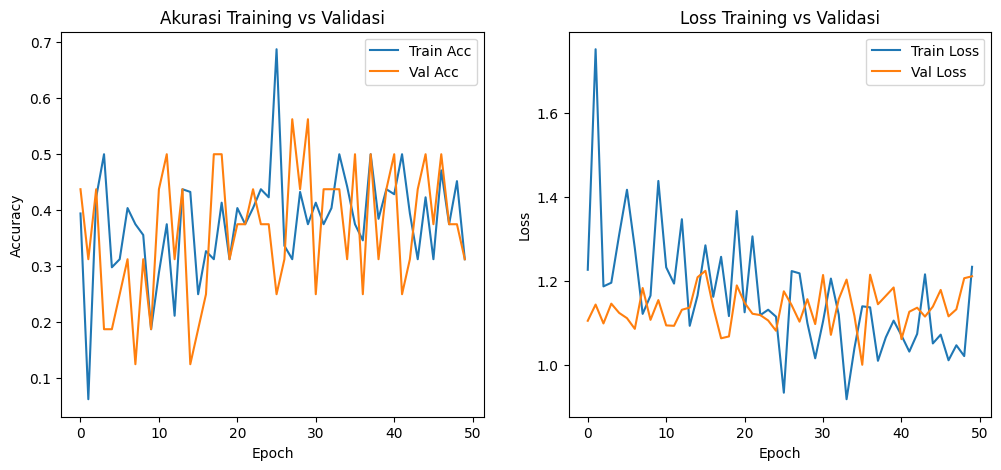

In [82]:
# ============================================
# TRAINING
# ============================================
history = model1.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    steps_per_epoch=train_gen.samples // train_gen.batch_size,
    validation_steps=val_gen.samples // val_gen.batch_size
)
# ============================================
# PLOT TRAINING RESULT
# ============================================
plt.figure(figsize=(12,5))
# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Akurasi Training vs Validasi")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Training vs Validasi")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
Prediksi: dokar
Probabilitas: [[0.24031317 0.38934103 0.3703458 ]]


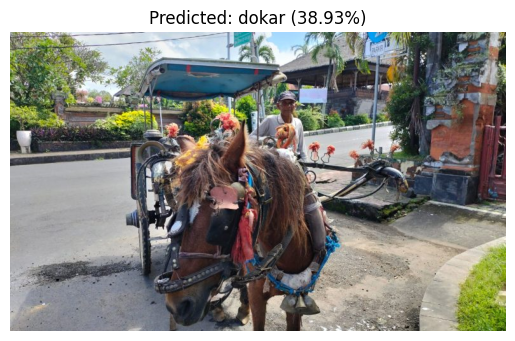

In [23]:
# ============================================
# 6. MENGECEK PREDIKSI Gambar Baru
# ============================================
def predict_image(path):
    img = Image.open(path).resize((224,224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    classes = list(train_gen.class_indices.keys())
    return classes[np.argmax(pred)], pred

# contoh prediksi
img_path = fileimg
label, prob = predict_image(img_path)
print("Prediksi:", label)
print("Probabilitas:", prob)

#plotting the image with predicted label
plt.imshow(Image.open(img_path))
plt.title(f"Predicted: {label} ({np.max(prob)*100:.2f}%)")
plt.axis('off')
plt.show()

In [26]:
# Gunakan pretrained ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # freeze base model (transfer learning tahap 1)

# Tambahkan lapisan baru di atasnya
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # 3 kelas: becak, dokar, pedati

model = Model(model_name="model2", inputs=base_model.input, outputs=output)


In [27]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,702,851 (94.23 MB)

 Trainable params: 1,115,139 (4.25 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [29]:
# Unfreeze beberapa layer terakhir
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile ulang dengan learning rate lebih kecil
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tuning
history_finetune = model.fit(
    train_gen,
    epochs=100,
    validation_data=val_gen
)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.3886 - loss: 1.1804 - val_accuracy: 0.2759 - val_loss: 1.1061
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3882 - loss: 1.1733 - val_accuracy: 0.3793 - val_loss: 1.1154
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.3408 - loss: 1.1691 - val_accuracy: 0.3793 - val_loss: 1.1180
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3492 - loss: 1.2081 - val_accuracy: 0.3448 - val_loss: 1.1210
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4989 - loss: 1.0695 - val_accuracy: 0.4138 - val_loss: 1.0993
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3723 - loss: 1.1426 - val_accuracy: 0.4138 - val_loss: 1.1169
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3884 - loss: 1.2036 - val_accuracy: 0.4138 - val_loss: 1.1211
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.3992 - loss: 1.0991 - val_accuracy: 0.4828 - val_loss: 1.1210
Epoch 9

Val Akurasi [0.27586206793785095, 0.37931033968925476, 0.37931033968925476, 0.3448275923728943, 0.4137931168079376, 0.4137931168079376, 0.4137931168079376, 0.48275861144065857, 0.4482758641242981, 0.4482758641242981, 0.4137931168079376, 0.4137931168079376, 0.4137931168079376, 0.4137931168079376, 0.37931033968925476, 0.37931033968925476, 0.37931033968925476, 0.4137931168079376, 0.37931033968925476, 0.37931033968925476, 0.37931033968925476, 0.3448275923728943, 0.37931033968925476, 0.3448275923728943, 0.3448275923728943, 0.3103448152542114, 0.3448275923728943, 0.37931033968925476, 0.37931033968925476, 0.3448275923728943, 0.3448275923728943, 0.37931033968925476, 0.4482758641242981, 0.4137931168079376, 0.4137931168079376, 0.37931033968925476, 0.4137931168079376, 0.4137931168079376, 0.48275861144065857, 0.4137931168079376, 0.4482758641242981, 0.4137931168079376, 0.517241358757019, 0.4137931168079376, 0.4482758641242981, 0.4482758641242981, 0.4137931168079376, 0.4482758641242981, 0.4827586114

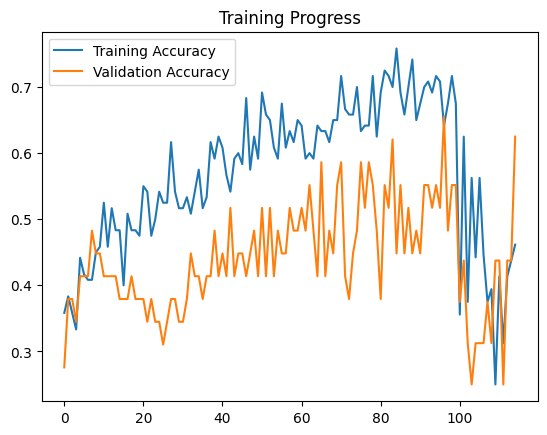

In [48]:
acc = history_finetune.history['accuracy'] + history.history['accuracy']
val_acc = history_finetune.history['val_accuracy'] + history.history['val_accuracy']

print("Val Akurasi", val_acc)
print("Train Akurasi", acc)

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training Progress")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Prediksi: becak


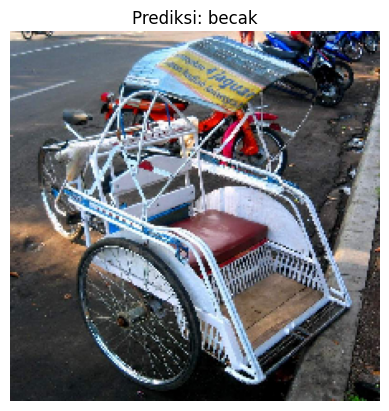

In [35]:
import tensorflow.keras.preprocessing.image as image
fileimg = "D:/KULIAH/S2/Semester 2/Proposal Thesis/TugasIbuHanna Mengarah ke Tugas Akhir/Codingan/codinganPakSurya/dataset_images/becak/Image_49.jpg"
img = image.load_img(fileimg, target_size=(224,224))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
class_names = list(train_gen.class_indices.keys())
predicted_label = class_names[np.argmax(pred)]
print("Prediksi:", predicted_label)
plt.imshow(img)
plt.title(f"Prediksi: {predicted_label}")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Prediksi: dokar
Probabilitas: [[0.29399616 0.52058285 0.18542093]]


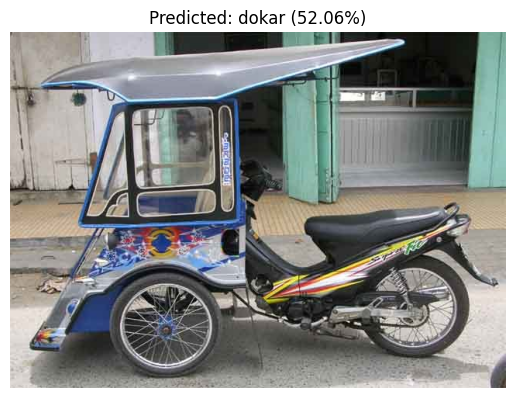

In [51]:
# ============================================
# 6. MENGECEK PREDIKSI Gambar Baru
# ============================================
fileimg = "D:/KULIAH/S2/Semester 2/Proposal Thesis/TugasIbuHanna Mengarah ke Tugas Akhir/Codingan/codinganPakSurya/dataset_images/becak/Image_50.jpg"
def predict_image(path):
    img = Image.open(path).resize((224,224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    classes = list(train_gen.class_indices.keys())
    return classes[np.argmax(pred)], pred

# contoh prediksi
img_path = fileimg
label, prob = predict_image(img_path)
print("Prediksi:", label)
print("Probabilitas:", prob)

#plotting the image with predicted label
plt.imshow(Image.open(img_path))
plt.title(f"Predicted: {label} ({np.max(prob)*100:.2f}%)")
plt.axis('off')
plt.show()

Model Klasifikasi

In [57]:
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


In [58]:
train_dir = "D:/KULIAH/S2/Semester 2/Proposal Thesis/TugasIbuHanna Mengarah ke Tugas Akhir/Codingan/codinganPakSurya/dataset_images"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)
print("Class indices:", train_generator.class_indices)


Found 120 images belonging to 3 classes.
Found 29 images belonging to 3 classes.
Class indices: {'becak': 0, 'dokar': 1, 'pedati': 2}


In [59]:
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

# Freeze semua layer ResNet50
for layer in base_model.layers:
    layer.trainable = False


In [60]:
model = models.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,113,027 (91.98 MB)

 Trainable params: 525,315 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_889']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.2710 - loss: 1.4005 - val_accuracy: 0.3793 - val_loss: 1.1088
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3450 - loss: 1.1216 - val_accuracy: 0.2069 - val_loss: 1.1166
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3225 - loss: 1.2144 - val_accuracy: 0.2069 - val_loss: 1.1258
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3708 - loss: 1.2105 - val_accuracy: 0.3793 - val_loss: 1.1145
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3785 - loss: 1.1934 - val_accuracy: 0.4828 - val_loss: 1.1108
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3502 - loss: 1.2038 - val_accuracy: 0.4138 - val_loss: 1.1115
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4560 - loss: 1.1101 - val_accuracy: 0.3103 - val_loss: 1.1124
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3088 - loss: 1.2457 - val_accuracy: 0.3103 - val_loss: 1.1143
Epoch 9/10
4/4 ━━━━━━━━━━━

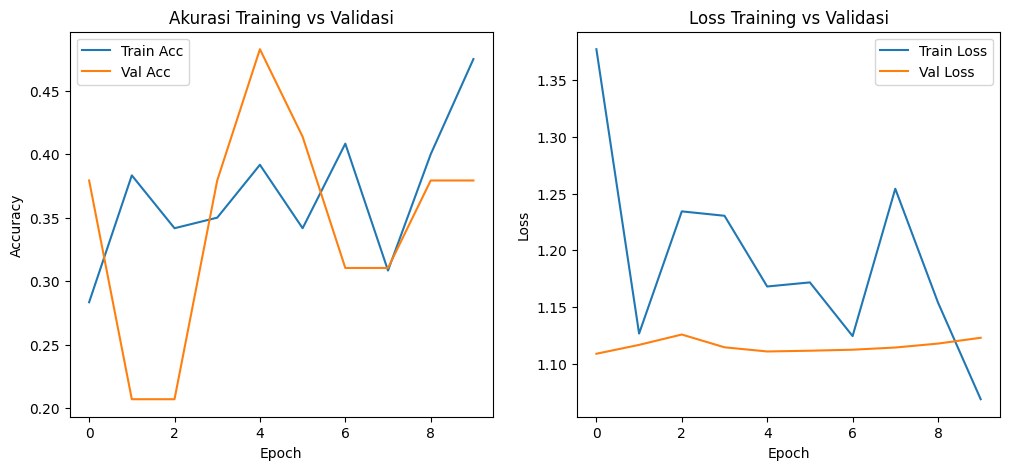

In [61]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)
plt.figure(figsize=(12,5))
# Plot akurasi
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Akurasi Training vs Validasi")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
# Plot loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Training vs Validasi")
plt.xlabel("Epoch") 
plt.ylabel("Loss")
plt.legend()
plt.show()


In [62]:
val_loss, val_acc = model.evaluate(val_generator)
print("Validation Accuracy:", val_acc)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3793 - loss: 1.1229
Validation Accuracy: 0.37931033968925476


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step


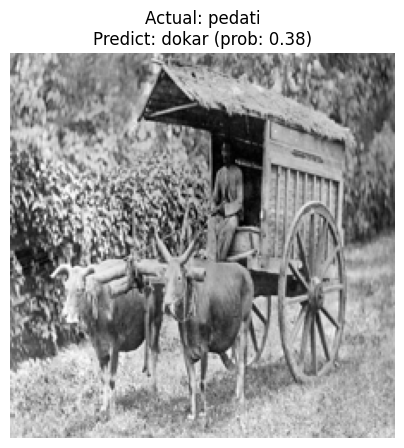

In [66]:
def plot_prediction(model, img_path, actual_label, class_indices):
    img = Image.open(img_path).resize((224, 224))
    img_array = np.array(img) / 255.0
    img_exp = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_exp)
    pred_idx = np.argmax(pred)
    pred_label = list(class_indices.keys())[pred_idx]
    prob = np.max(pred)

    plt.figure(figsize=(5,5))
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Actual: {actual_label}\nPredict: {pred_label} (prob: {prob:.2f})")
    plt.show()

img_test = "D:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\codinganPakSurya\dataset_images\pedati\Image_46.png"  # sesuaikan
actual = "pedati"

plot_prediction(model, img_test, actual, train_generator.class_indices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


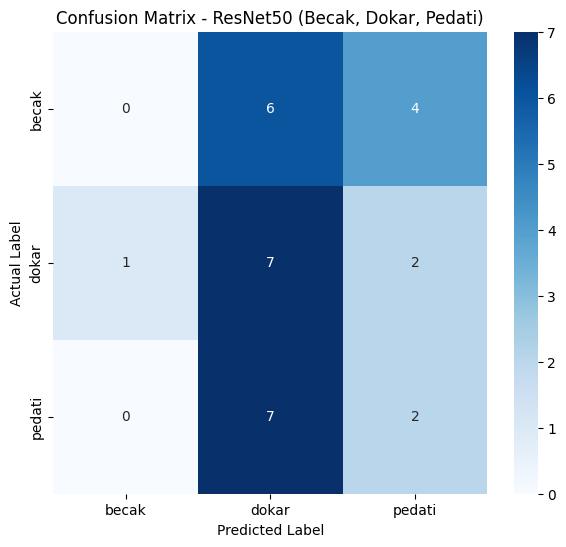


Classification Report:

              precision    recall  f1-score   support

       becak       0.00      0.00      0.00        10
       dokar       0.35      0.70      0.47        10
      pedati       0.25      0.22      0.24         9

    accuracy                           0.31        29
   macro avg       0.20      0.31      0.23        29
weighted avg       0.20      0.31      0.23        29



In [69]:
# Reset generator agar mulai dari awal
val_generator.reset()

# Prediksi seluruh batch di validation set
pred = model.predict(val_generator, verbose=1)

# Konversi probabilitas → index kelas
y_pred = np.argmax(pred, axis=1)

# Label asli
y_true = val_generator.classes

# Nama kelas
labels = list(val_generator.class_indices.keys())

# ==========================================
# 2. CONFUSION MATRIX
# ==========================================

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True, 
    fmt="d",
    cmap="Blues",
    xticklabels=labels,
    yticklabels=labels
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - ResNet50 (Becak, Dokar, Pedati)")
plt.show()

# ==========================================
# 3. CLASSIFICATION REPORT (Precision, Recall, F1)
# ==========================================
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=labels))

Buat Model baru

In [83]:
# ============================================
# IMPORT
# ============================================
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [87]:


# ============================================
# DATASET DIRECTORIES
# ============================================
train_dir = "D:/KULIAH/S2/Semester 2/Proposal Thesis/TugasIbuHanna Mengarah ke Tugas Akhir/Codingan/codinganPakSurya/dataset_images"

# ============================================
# IMAGE AUGMENTATION
# ============================================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.5, 1.5],
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='training'
)

val_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=8,
    class_mode='categorical',
    subset='validation'
)

num_classes = train_gen.num_classes
print("Classes =", train_gen.class_indices)

# ============================================
# LOAD RESNET50 BASE MODEL
# ============================================
base_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_tensor=Input(shape=(224, 224, 3))
)

# ============================================
# FREEZE (LOCK) SEMUA LAYER DULU
# ============================================
for layer in base_model.layers:
    layer.trainable = False

# ============================================
# CUSTOM CLASSIFIER
# ============================================
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation="softmax")(x)

model3 = Model(inputs=base_model.input, outputs=output_layer)

# ============================================
# COMPILE MODEL (STAGE 1)
# ============================================
model3.compile(
    optimizer=AdamW(learning_rate=1e-4, weight_decay=1e-4),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model3.summary()

# ============================================
# TRAIN STAGE 1 (TRAIN TOP LAYER ONLY)
# ============================================
callbacks = [
    EarlyStopping(patience=8, restore_best_weights=True),
    ReduceLROnPlateau(factor=0.3, patience=4, verbose=1),
    ModelCheckpoint("model3_best.keras", save_best_only=True)
]

history = model3.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=callbacks
)

# ============================================
# FINE TUNING — UNFREEZE LAYER AKHIR RESNET50
# ============================================
for layer in base_model.layers[-50:]:  # unfreeze 50 layer terakhir
    layer.trainable = True

model3.compile(
    optimizer=AdamW(learning_rate=1e-5, weight_decay=1e-6),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# ============================================
# TRAIN STAGE 2 (FINE-TUNING)
# ============================================
history_finetune = model3.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,
    callbacks=callbacks
)

# ============================================
# EVALUATE MODEL
# ============================================
loss, acc = model3.evaluate(val_gen)
print(f"\nValidation Accuracy: {acc:.4f}")

# ============================================
# CONFUSION MATRIX
# ============================================
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# predict semua data validasi
val_gen.reset()
pred = model3.predict(val_gen)
pred_classes = np.argmax(pred, axis=1)
true_classes = val_gen.classes
labels = list(val_gen.class_indices.keys())

cm = confusion_matrix(true_classes, pred_classes)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=labels, yticklabels=labels,
            cmap="Blues")
plt.title("Confusion Matrix - model3")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

print("\nClassification Report:\n")
print(classification_report(true_classes, pred_classes, target_names=labels))

# ============================================
# FUNCTION TO PREDICT SINGLE IMAGE
# ============================================
def predict_image(filepath):
    img = Image.open(filepath).resize((224, 224))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model3.predict(img_array)
    class_name = labels[np.argmax(pred)]

    plt.imshow(img)
    plt.title(f"Predicted: {class_name}")
    plt.axis("off")
    plt.show()

    return class_name


Found 120 images belonging to 3 classes.
Found 29 images belonging to 3 classes.
Classes = {'becak': 0, 'dokar': 1, 'pedati': 2}


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_11[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 24,638,339 (93.99 MB)

 Trainable params: 1,050,627 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/20


d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1786']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.2668 - loss: 1.5165

UnknownError: Graph execution error:

Detected at node PyFunc defined at (most recent call last):
<stack traces unavailable>
OSError: broken data stream when reading image file
Traceback (most recent call last):

  File "d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\tensorflow\python\ops\script_ops.py", line 269, in __call__
    ret = func(*args)
          ^^^^^^^^^^^

  File "d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\tensorflow\python\autograph\impl\api.py", line 643, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^

  File "d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\tensorflow\python\data\ops\from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py", line 248, in _finite_generator
    yield self._standardize_batch(self.py_dataset[i])
                                  ~~~~~~~~~~~~~~~^^^

  File "d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 68, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\keras\src\legacy\preprocessing\image.py", line 313, in _get_batches_of_transformed_samples
    img = image_utils.load_img(
          ^^^^^^^^^^^^^^^^^^^^^

  File "d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\keras\src\utils\image_utils.py", line 292, in load_img
    img = img.resize(width_height_tuple, resample)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

  File "d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\PIL\Image.py", line 2336, in resize
    the source image region to be reduced.
    ^^^^^^^^^^^

  File "d:\KULIAH\S2\Semester 2\Proposal Thesis\TugasIbuHanna Mengarah ke Tugas Akhir\Codingan\env\Lib\site-packages\PIL\ImageFile.py", line 319, in load
    with open(self.filename) as fp:

OSError: broken data stream when reading image file


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_multi_step_on_iterator_297268]